# X-Mean Clustering sample (Non Hierarchical Clustering)

- No need to specify number of clusters.
- In addition to the K-Means algorithm, execute clustering by determining whether a particular cluster is more appropriately represented by two Gaussian distributions or one.

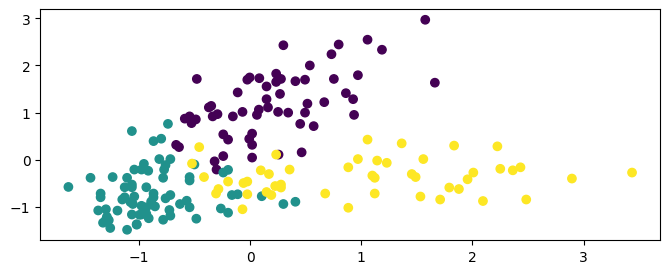

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import cluster
from sklearn import preprocessing

from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer


# Prepare dataset, standardize, and visualize.
df_wine_classification = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
    header=None
)

df_wine = df_wine_classification[
    [0, 10, 13]
]
df_wine.columns = [
    u'1) Alcohol',
    u'10)Color intensity',
    u'13)Proline'
]

X = df_wine[
    ['10)Color intensity', '13)Proline']
]

sc = preprocessing.StandardScaler()
X_norm = sc.fit_transform(X)
x = X_norm[:, 0]
y = X_norm[:, 1]
z = df_wine['1) Alcohol']

plt.figure(figsize=(8, 3))
plt.scatter(x, y, c=z)
plt.show()

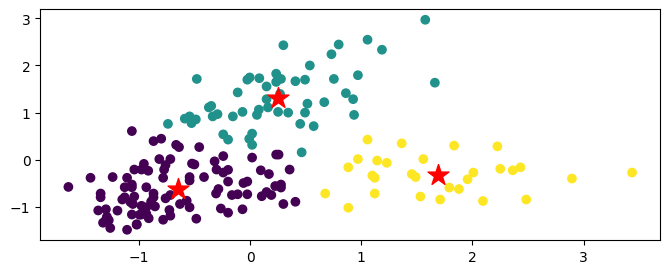

In [2]:
# Plot the clustering results (without specifying the number of clusters).
xm_c = kmeans_plusplus_initializer(X_norm, 2).initialize()
xm_i = xmeans(
    data=X_norm,
    initial_centers=xm_c,
    kmax=20,
    ccore=True
)
xm_i.process()

z_xm = np.ones(X_norm.shape[0])

for i in range(len(xm_i._xmeans__clusters)):
    z_xm[xm_i._xmeans__clusters[i]] = i + 1

plt.figure(figsize=(8 ,3))
plt.scatter(x, y, c=z_xm)
centers = np.array(
    xm_i._xmeans__centers,
    dtype=object
)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    s=250,
    marker='*',
    c='red'
)
plt.show()